In [17]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import researchpy as rp
from scipy.stats import levene

In [18]:
df2=pd.read_csv('data/00-insurance.csv', index_col=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 19 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   object 
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 73.2+ KB


In [28]:
df=pd.read_csv('data/03-primas_bajas.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


Happy coding 📊📈📉

# Pair Programming Asunciones Regresión Lineal

## Ana Campos y Ana González

### En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [30]:
numericas=df.select_dtypes(np.number)
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [31]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de prima
numericas_col = df.select_dtypes(include = np.number).drop("charges", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.charges, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val


In [32]:
resultados

{'age': 0.0, 'bmi': 0.0, 'children': 0.0}

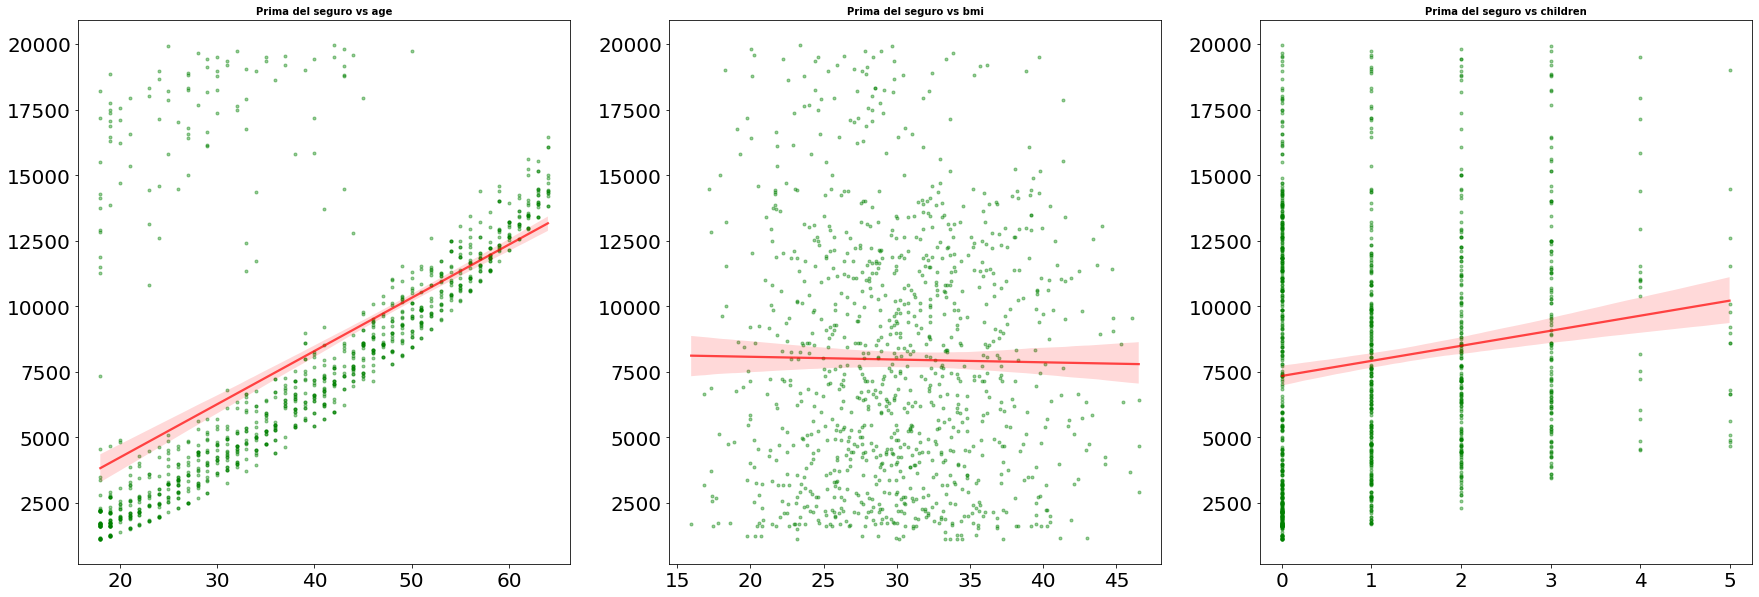

In [35]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "green", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
#fig.tight_layout()
#fig.delaxes(axes[-1])
#fig.delaxes(axes[-2])
#fig.delaxes(axes[-3]);

Rechazamos H0 para todas las variables numericas, no hay homocedasticidad

In [36]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [37]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [38]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
mujer=df[df['sex']=='female']['charges']
hombre=df[df['sex']=='male']['charges']

In [41]:
fumadores=df[df['smoker']=='yes']['charges']
no_fumadores=df[df['smoker']=='no']['charges']

In [42]:
sw=df[df['region']=='southwest']['charges']
se=df[df['region']=='southeast']['charges']
nw=df[df['region']=='northwest']['charges']
ne=df[df['region']=='northeast']['charges']



In [43]:
levene_genero=stats.levene(mujer,hombre,center='median')
levene_genero

LeveneResult(statistic=0.014307877636811713, pvalue=0.90481033143731)

In [45]:
levene_tabaco=stats.levene(fumadores,no_fumadores,center='median')
levene_tabaco

LeveneResult(statistic=52.502355819402666, pvalue=8.249768434771198e-13)

In [46]:
levene_estado=stats.levene(sw,se,nw,ne,center='median')
levene_estado

LeveneResult(statistic=1.7043495481219235, pvalue=0.1643972118055969)

In [47]:
bartlett_tabaco=stats.bartlett(fumadores,no_fumadores)
bartlett_tabaco

BartlettResult(statistic=54.03362795764284, pvalue=1.9708749087202543e-13)

Para género y estado, nuestro p-valor es mayor de 0.05, por lo tanto los datos son homocedásticos
Sin embargo para fumadores nuestro p valor es menor de 0.05, por lo tanto los datos son heterocedásticos

In [33]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab, test_results, expected = rp.crosstab(df["bmi"], df["age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [34]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 22678.0) =,22664.9929
1,p-value =,0.5231
2,Cramer's V =,0.6805


In [48]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab2, test_results2, expected2 = rp.crosstab(df["bmi"], df["children"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [49]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 2465.0) =,2437.0580
1,p-value =,0.6517
2,Cramer's V =,0.6768


Nuestro p-valor es mayor a 0.05, por lo tanto no se puede concluir que las variables estén asociadas(no se puede rechazar H0). 
Nuesstras variables son independientes
El test de Cramer tiene un valor mayor a 0.5, por lo que la independencia es alta.

In [50]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab3, test_results3, expected3 = rp.crosstab(df["age"], df["children"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [51]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 230.0) =,441.1662
1,p-value =,0.0000
2,Cramer's V =,0.2880


En el caso de estas variables, edad e hijos, si son dependientes, con p-valor<0.05
Según el valor de Cramer la independencia es baja ya que esta entre los valores 0.1 y 0.3